# Clustering avec K-Means

## Introduction

In [29]:
!pip freeze > requirments.txt


In [34]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['types',
 'builtins',
 'numpy',
 'sklearn.preprocessing',
 'seaborn',
 'sklearn.datasets',
 'pandas',
 'builtins',
 'matplotlib.pyplot']

In [37]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

In [39]:
for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.9.0
scikit-learn==0.20.0
pandas==0.24.2
numpy==1.15.2
matplotlib==3.0.0
ipywidgets==7.5.1
bqplot==0.12.1


Le **clustering** ou "classification non supervisée" consiste à diviser un ensemble de données en un certain nombre de groupes homogènes, de sorte que les données de chaque sous-ensemble partagent des caractéristiques communes, qui correspondent le plus souvent à des critères de proximité (similarité) que l'on définit.

Dans le monde de l’entreprise, on rencontre ce sous-domaine du machine learning à travers, par exemple, la segmentation de clients qui permet de comprendre et mieux cibler les clients. 
Un autre cas d’usage correspond à la détection de valeurs aberrantes et plus particulièrement la détection de fraudes ou d'anomalies, que ce soit dans les transports en commun, les transactions bancaires ou encore au sujet de la consommation électrique… Les applications sont nombreuses.

## K-Means


**K-means** est un algorithme non supervisé de clustering. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront  dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance). Une même observation ne pourra donc appartenir à deux clusters différents.

In [33]:
from scipy.spatial.distance import euclidean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets
from sklearn.cluster import KMeans

from ipywidgets import IntSlider, HBox, VBox, Button

from bqplot import (
    LogScale, LinearScale, OrdinalColorScale, ColorAxis,
    Axis, Scatter, Lines, CATEGORY10, Label, Figure, Tooltip
)

## Les données

Nous allons considérer que nous avons les données de 40 utilisateurs de trains
Pour ces 40 usagers, nous connaissons:
- Leur degré de satisfaction (une note sur 10)
- La fréquence d'achats de billets de train par mois = la somme de tous les achats pour une année divisée par 12

Nous souhaitons mieux connaître ces clients à partir de ces deux features.
C'est pourquoi nous allons essayer de les segmenter en plusieurs catégories de manière à avoir des groupes de clients qui ont les mêmes caractéristiques et pour lesquels nous allons pouvoir proposer des services ou des communications personnalisés.
Nous allons donc essayer d'extraire des connaissances pour tenter de relever des sous-ensembles de données difficiles à identifier à l’œil nu.

Voici à quoi ressemble nos données:

In [2]:
data = pd.read_csv('data_clustering.csv')
data.head()

,Satisfaction,Fréquence d’achats par mois
0,4,0.47
1,6,1.52
2,5,0.81
3,7,1.51
4,4,2.86


Ensuite, nous allons simplement afficher nos données dans un espace à 2 dimensions (puisque nous n'avons que 2 features)

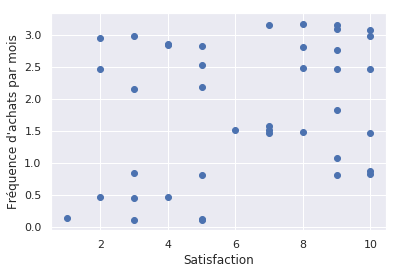

In [3]:
plt.scatter(data['Satisfaction'], data['Fréquence d’achats par mois'])
plt.xlabel('Satisfaction')
plt.ylabel("Fréquence d'achats par mois")
plt.show()

## Regroupement en 2 clusters

Nous allons demander à K-Means de nous segmenter les clients en 2 groupes qui ont les mêmes caractéristiques

In [4]:
x = data.copy()

In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Après 300 itérations le modèle a défini les 2 catégories

In [6]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

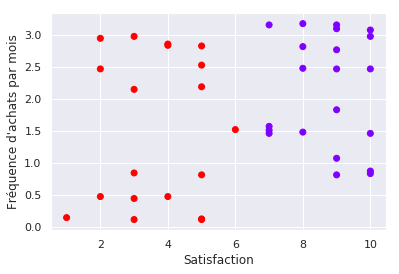

In [7]:
plt.scatter(clusters['Satisfaction'], clusters['Fréquence d’achats par mois'], c = clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Fréquence d'achats par mois")
plt.show()

# Normalisation des données

Nous avons l'impression ici que la "Satisfaction" est choisie comme critère de regroupement et que la fréquence d'achats a été négligée. 

Ce résultat peut être considéré biaisé car notre algorithme a négligé le critère "Fréquence d'achats par mois". 

En effet,le critère "Satisfaction" a été choisi comme caractéristique car il avait de grandes valeurs.

C'est pourquoi nous devons mettre les données à l'échelle en les normalisant afin que les deux données aient une pondération égale.
Nous ne pouvons pas négliger la "Fréquence d'achats par mois", car elle joue un rôle important dans les analyses de la segmentation du marché.

In [8]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
#x_scaled

/home/sihihi/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


Une fois normalisées, voici à quoi ressemble nos données:

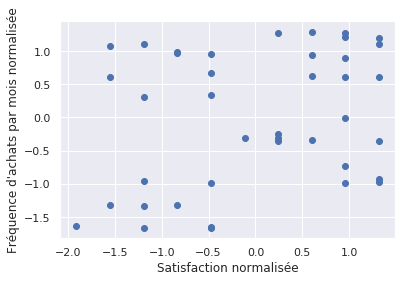

In [9]:
plt.scatter(x_scaled[:,0], x_scaled[:,1])
plt.xlabel('Satisfaction normalisée')
plt.ylabel("Fréquence d'achats par mois normalisée")
plt.show()

******************************************************************************************************************

# DEMO

**TODO**: description de la démo

In [10]:
initial_k = 0

In [11]:
blobs = x_scaled

In [12]:
x_sc = LinearScale(min=int(blobs[:,0].min()-2), max=int(blobs[:,0].max()+2))
y_sc = LinearScale(min=int(blobs[:,1].min()-2), max=int(blobs[:,1].max()+2))
c_sc = OrdinalColorScale(domain=np.arange(10).tolist(), colors=CATEGORY10[:6])

In [13]:
ax_y = Axis(label='y', scale=y_sc, orientation='vertical', side='left', grid_lines='solid')
ax_x = Axis(label='x', scale=x_sc, grid_lines='solid')

In [14]:
scat = Scatter(x=blobs[:,0],
               y=blobs[:,1],
               scales={'x': x_sc, 'y': y_sc, 'color': c_sc}, color=[1])

In [15]:
scat_centroids = Scatter(x=[0], y=[0], scales={"x": x_sc, "y": y_sc}, colors=["black"])

In [16]:
fig = Figure(marks=[scat, scat_centroids], title='K-means', animation_duration=10, axes=[ax_x, ax_y])

In [17]:
k_slider = IntSlider(min=2,
                     max=10,
                     step=1,
                     description='Nombre de clusters',
                     value=initial_k)

In [18]:
def change_k(change):
    kmeans = KMeans(n_clusters=k_slider.value).fit(blobs)
    scat.color=kmeans.labels_
    scat_centroids.x = kmeans.cluster_centers_[:, 0]
    scat_centroids.y = kmeans.cluster_centers_[:, 1]

In [19]:
k_slider.observe(change_k, 'value')

In [20]:
VBox([HBox([k_slider]), fig])

******************************************************************************************************************

## The elbow method

à expliquer

In [21]:
wcss = []

for i in range(1,18):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
#wcss

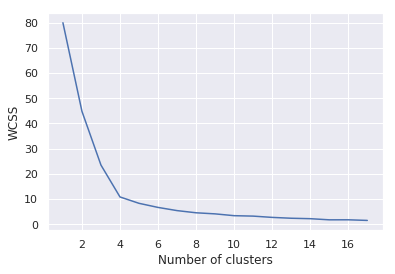

In [22]:
plt.plot(range(1,18), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans_new = KMeans(4)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new.head()

,Satisfaction,Fréquence d’achats par mois,cluster_pred
0,4,0.47,0
1,6,1.52,3
2,5,0.81,0
3,7,1.51,3
4,4,2.86,2


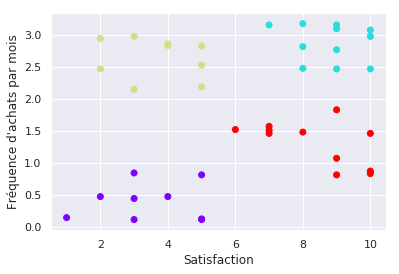

In [24]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Fréquence d’achats par mois'], c = cluster_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Fréquence d'achats par mois")
plt.show()